<a href="https://colab.research.google.com/github/muniprasadreddy/my-colab_work/blob/main/Incident_Notebook_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/incident_event_log.csv")

In [ ]:
data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [ ]:
data.shape

(141712, 36)

In [ ]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [ ]:
data["reopen_count"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

Class Distribution:
reopen_count
0    139398
1      1918
2       190
3       107
4        48
5        24
6        18
7         5
8         4
Name: count, dtype: int64


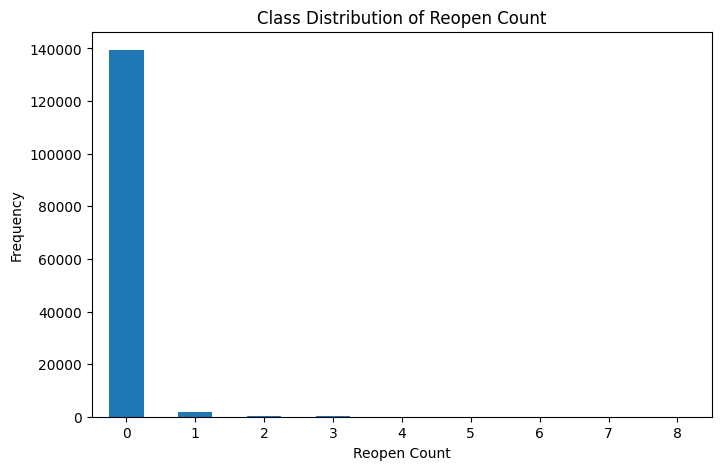

In [ ]:
import pandas as pd

# Assuming your DataFrame is named `data` and the target variable is 'reopen_count'

# Check the distribution of classes in the target variable
class_distribution = data['reopen_count'].value_counts()

# Print the distribution
print("Class Distribution:")
print(class_distribution)

# Optionally, you can visualize the class distribution using a bar plot
import matplotlib.pyplot as plt

# Plotting the class distribution
plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar')
plt.title('Class Distribution of Reopen Count')
plt.xlabel('Reopen Count')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [ ]:

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   141712 non-null  object
 1   incident_state           141712 non-null  object
 2   active                   141712 non-null  bool  
 3   reassignment_count       141712 non-null  int64 
 4   reopen_count             141712 non-null  int64 
 5   sys_mod_count            141712 non-null  int64 
 6   made_sla                 141712 non-null  bool  
 7   caller_id                141712 non-null  object
 8   opened_by                141712 non-null  object
 9   opened_at                141712 non-null  object
 10  sys_created_by           141712 non-null  object
 11  sys_created_at           141712 non-null  object
 12  sys_updated_by           141712 non-null  object
 13  sys_updated_at           141712 non-null  object
 14  contact_type        

In [ ]:
# Summary of numerical columns
print(data.describe())

       reassignment_count   reopen_count  sys_mod_count
count       141712.000000  141712.000000  141712.000000
mean             1.104197       0.021918       5.080946
std              1.734673       0.207302       7.680652
min              0.000000       0.000000       0.000000
25%              0.000000       0.000000       1.000000
50%              1.000000       0.000000       3.000000
75%              1.000000       0.000000       6.000000
max             27.000000       8.000000     129.000000


In [ ]:
# Check the number of unique values in categorical columns
for col in data.select_dtypes(include=['object']).columns:
    print(f"{col}: {data[col].nunique()}")

number: 24918
incident_state: 9
caller_id: 5245
opened_by: 208
opened_at: 19849
sys_created_by: 186
sys_created_at: 11553
sys_updated_by: 846
sys_updated_at: 50664
contact_type: 5
location: 225
category: 59
subcategory: 255
u_symptom: 526
cmdb_ci: 51
impact: 3
urgency: 3
priority: 4
assignment_group: 79
assigned_to: 235
notify: 2
problem_id: 253
rfc: 182
vendor: 5
caused_by: 4
closed_code: 18
resolved_by: 217
resolved_at: 18506
closed_at: 2707


In [ ]:
duplicates = data.duplicated().sum()
duplicates

0

In [ ]:
null_values = data.isnull().sum()

In [ ]:
null_values

,0
number,0
incident_state,0
active,0
reassignment_count,0
reopen_count,0
sys_mod_count,0
made_sla,0
caller_id,0
opened_by,0
opened_at,0


In [ ]:
import pandas as pd

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Dictionary to hold outlier counts for each column
outlier_counts = {}

# Identify outliers for each numeric column
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    outliers = detect_outliers(data, col)
    if not outliers.empty:
        outlier_counts[col] = outliers.shape[0]

# Print the columns with outliers and their counts
print("Columns with outliers and their counts:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

# Count the total number of outliers
total_outlier_count = sum(outlier_counts.values())
print(f"Total number of outliers detected: {total_outlier_count}")


Columns with outliers and their counts:
reassignment_count: 19635 outliers
reopen_count: 2314 outliers
sys_mod_count: 10900 outliers
Total number of outliers detected: 32849


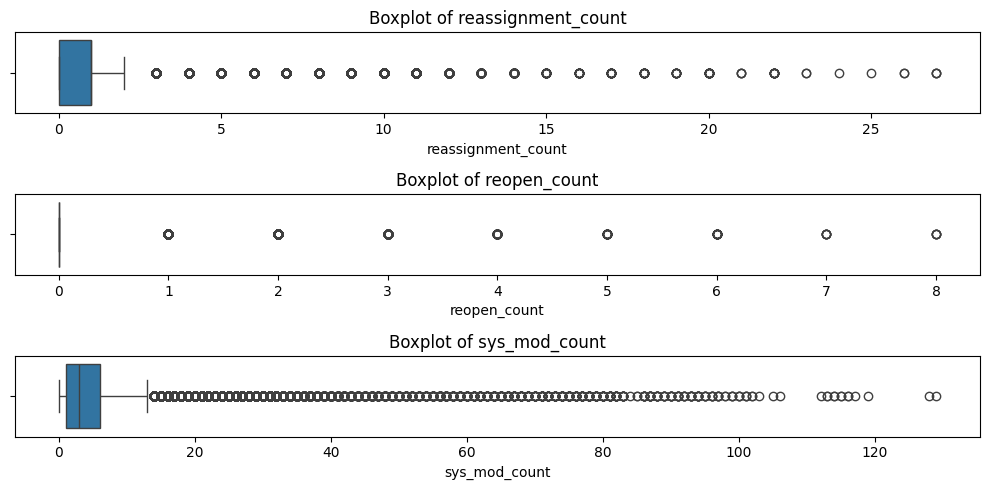

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplots for each numeric column
plt.figure(figsize=(10, 5))
for i, col in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(len(data.select_dtypes(include=['float64', 'int64']).columns), 1, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Function to apply log transformation to numeric columns
def log_transform(data):
    # Loop through each numeric column in the DataFrame
    for col in data.select_dtypes(include=['float64', 'int64']).columns:
        # Apply log transformation and add 1 to avoid log(0)
        data[col] = np.log(data[col] + 1)
    return data

data_treated = data.copy()
# Apply the log transformation to the dataset
data_log_transformed = log_transform(data_treated)

# Initialize a dictionary to hold counts of remaining outliers
remaining_outlier_counts_log = {}

# Check for remaining outliers after log transformation
for col in data_log_transformed.select_dtypes(include=['float64', 'int64']).columns:
    # Detect outliers in the transformed data
    outliers_after_log = detect_outliers(data_log_transformed, col)
    # Store the count of outliers for each column
    remaining_outlier_counts_log[col] = outliers_after_log.shape[0]

# Print the remaining outliers after log transformation
print("\nRemaining outliers after log transformation:")
for col, count in remaining_outlier_counts_log.items():
    print(f"{col}: {count} outliers")

# Count the total number of remaining outliers
total_remaining_outliers_log = sum(remaining_outlier_counts_log.values())
print(f"Total remaining outliers detected after log transformation: {total_remaining_outliers_log}")



Remaining outliers after log transformation:
reassignment_count: 6747 outliers
reopen_count: 2314 outliers
sys_mod_count: 977 outliers
Total remaining outliers detected after log transformation: 10038


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns for label encoding
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Display the first few rows of the encoded DataFrame
print("DataFrame after Label Encoding:")
print(data.head())

# Check for any remaining categorical columns to ensure encoding was done
remaining_categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("\nRemaining categorical columns after encoding:")
print(remaining_categorical_cols)


DataFrame after Label Encoding:
   number  incident_state  active  reassignment_count  reopen_count  \
0       0               7    True                   0             0   
1       0               8    True                   0             0   
2       0               8    True                   0             0   
3       0               6   False                   0             0   
4       1               7    True                   0             0   

   sys_mod_count  made_sla  caller_id  opened_by  opened_at  ...  \
0              0      True       1463        201      12990  ...   
1              2      True       1463        201      12990  ...   
2              3      True       1463        201      12990  ...   
3              4      True       1463        201      12990  ...   
4              0      True       1463        121      12991  ...   

   u_priority_confirmation  notify  problem_id  rfc  vendor  caused_by  \
0                    False       0           0    0       

In [ ]:
data.columns

Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'impact', 'urgency', 'priority',
       'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'problem_id', 'rfc', 'vendor',
       'caused_by', 'closed_code', 'resolved_by', 'resolved_at', 'closed_at'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define X and Y
X = data.drop(columns=['reopen_count'])
Y = data['reopen_count']

# First, split the data into training + validation (80%) and test (20%) sets
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=42)

# Now, split the training + validation set into training (70%) and validation (10%) sets
# 10% of the original data corresponds to 10% / 80% of the training + validation split
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.10/0.80, stratify=Y_train_val, random_state=42)

# Print the sizes of the splits
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")


Training set size: 99197
Validation set size: 14172
Test set size: 28343


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Cross-Validated Training Set Metrics:
Precision: 0.9937
Recall: 0.9939
Accuracy: 0.9939
F1 Score: 0.9933

Validation Set Metrics:
Precision: 0.9953
Recall: 0.9953
Accuracy: 0.9953
F1 Score: 0.9950

Test Set Metrics:
Precision: 0.9950
Recall: 0.9952
Accuracy: 0.9952
F1 Score: 0.9948


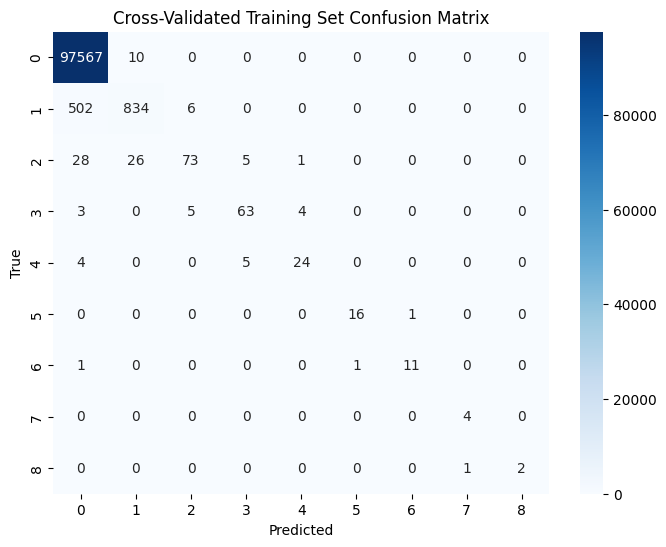

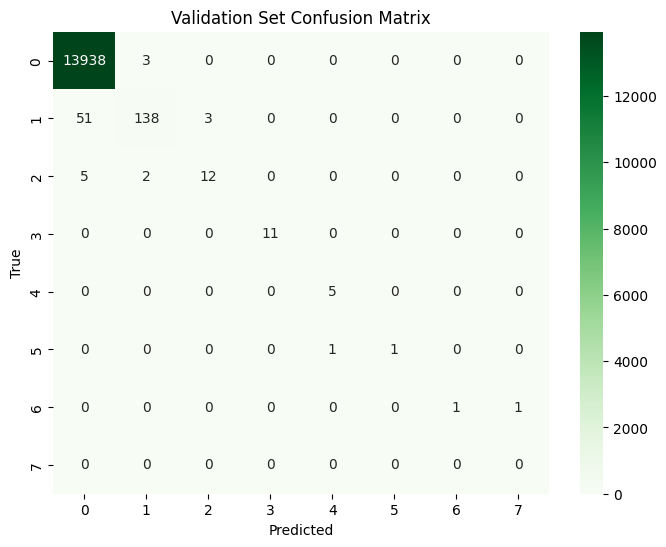

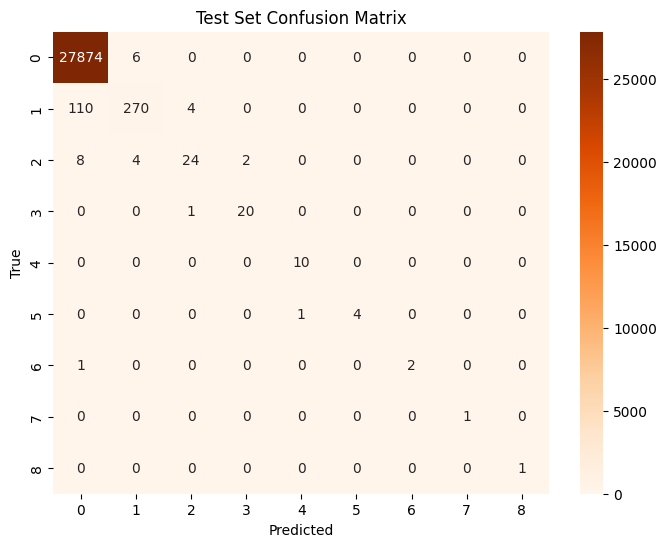

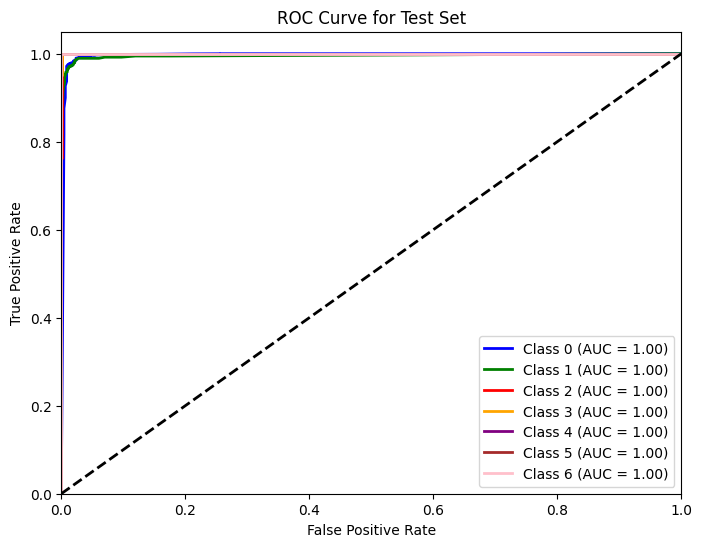

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Set up cross-validation with 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation predictions on the training data
Y_train_pred_cv = cross_val_predict(rf_model, X_train, Y_train, cv=cv)

# Calculate evaluation metrics for cross-validated predictions on training data
precision_train_cv = precision_score(Y_train, Y_train_pred_cv, average='weighted')
recall_train_cv = recall_score(Y_train, Y_train_pred_cv, average='weighted')
accuracy_train_cv = accuracy_score(Y_train, Y_train_pred_cv)
f1_train_cv = f1_score(Y_train, Y_train_pred_cv, average='weighted')

# Fit the model on the entire training data after cross-validation
rf_model.fit(X_train, Y_train)

# Make predictions on the validation and test sets
Y_val_pred = rf_model.predict(X_val)
Y_test_pred = rf_model.predict(X_test)

# Calculate evaluation metrics for the validation set
precision_val = precision_score(Y_val, Y_val_pred, average='weighted')
recall_val = recall_score(Y_val, Y_val_pred, average='weighted')
accuracy_val = accuracy_score(Y_val, Y_val_pred)
f1_val = f1_score(Y_val, Y_val_pred, average='weighted')

# Calculate evaluation metrics for the test set
precision_test = precision_score(Y_test, Y_test_pred, average='weighted')
recall_test = recall_score(Y_test, Y_test_pred, average='weighted')
accuracy_test = accuracy_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred, average='weighted')

# Print the cross-validated results for the training set
print("Cross-Validated Training Set Metrics:")
print(f'Precision: {precision_train_cv:.4f}')
print(f'Recall: {recall_train_cv:.4f}')
print(f'Accuracy: {accuracy_train_cv:.4f}')
print(f'F1 Score: {f1_train_cv:.4f}')

# Print the results for the validation set
print("\nValidation Set Metrics:")
print(f'Precision: {precision_val:.4f}')
print(f'Recall: {recall_val:.4f}')
print(f'Accuracy: {accuracy_val:.4f}')
print(f'F1 Score: {f1_val:.4f}')

# Print the results for the test set
print("\nTest Set Metrics:")
print(f'Precision: {precision_test:.4f}')
print(f'Recall: {recall_test:.4f}')
print(f'Accuracy: {accuracy_test:.4f}')
print(f'F1 Score: {f1_test:.4f}')

# Confusion Matrix for Cross-Validated Training Set
conf_matrix_train = confusion_matrix(Y_train, Y_train_pred_cv)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title('Cross-Validated Training Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for Validation Set
conf_matrix_val = confusion_matrix(Y_val, Y_val_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_val, annot=True, fmt="d", cmap="Greens", xticklabels=True, yticklabels=True)
plt.title('Validation Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for Test Set
conf_matrix_test = confusion_matrix(Y_test, Y_test_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Oranges", xticklabels=True, yticklabels=True)
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve and AUC Calculation for Test Set
# Convert the labels into binary format (one-vs-all)
Y_test_bin = label_binarize(Y_test, classes=np.unique(Y_test))
n_classes = Y_test_bin.shape[1]

# Train the classifier using one-vs-rest strategy
ovr_rf_model = OneVsRestClassifier(rf_model)
Y_test_prob = ovr_rf_model.fit(X_train, Y_train).predict_proba(X_test)

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i], Y_test_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink']  # Color list for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Set up cross-validation with 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation predictions on the training data
Y_train_pred_cv = cross_val_predict(xgb_model, X_train, Y_train, cv=cv)

# Calculate evaluation metrics for cross-validated predictions on training data
precision_train_cv = precision_score(Y_train, Y_train_pred_cv, average='weighted')
recall_train_cv = recall_score(Y_train, Y_train_pred_cv, average='weighted')
accuracy_train_cv = accuracy_score(Y_train, Y_train_pred_cv)
f1_train_cv = f1_score(Y_train, Y_train_pred_cv, average='weighted')

# Fit the model on the entire training data after cross-validation
xgb_model.fit(X_train, Y_train)

# Make predictions on the validation and test sets
Y_val_pred = xgb_model.predict(X_val)
Y_test_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics for the validation set
precision_val = precision_score(Y_val, Y_val_pred, average='weighted')
recall_val = recall_score(Y_val, Y_val_pred, average='weighted')
accuracy_val = accuracy_score(Y_val, Y_val_pred)
f1_val = f1_score(Y_val, Y_val_pred, average='weighted')

# Calculate evaluation metrics for the test set
precision_test = precision_score(Y_test, Y_test_pred, average='weighted')
recall_test = recall_score(Y_test, Y_test_pred, average='weighted')
accuracy_test = accuracy_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred, average='weighted')

# Print the cross-validated results for the training set
print("Cross-Validated Training Set Metrics:")
print(f'Precision: {precision_train_cv:.4f}')
print(f'Recall: {recall_train_cv:.4f}')
print(f'Accuracy: {accuracy_train_cv:.4f}')
print(f'F1 Score: {f1_train_cv:.4f}')

# Print the results for the validation set
print("\nValidation Set Metrics:")
print(f'Precision: {precision_val:.4f}')
print(f'Recall: {recall_val:.4f}')
print(f'Accuracy: {accuracy_val:.4f}')
print(f'F1 Score: {f1_val:.4f}')

# Print the results for the test set
print("\nTest Set Metrics:")
print(f'Precision: {precision_test:.4f}')
print(f'Recall: {recall_test:.4f}')
print(f'Accuracy: {accuracy_test:.4f}')
print(f'F1 Score: {f1_test:.4f}')

# Detailed classification report for the cross-validated training set
print("\nCross-Validated Training Set Classification Report:")
print(classification_report(Y_train, Y_train_pred_cv))

# Detailed classification report for the validation set
print("\nValidation Set Classification Report:")
print(classification_report(Y_val, Y_val_pred))

# Detailed classification report for the test set
print("\nTest Set Classification Report:")
print(classification_report(Y_test, Y_test_pred))



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:57:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:57:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:57:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:58:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not use

Cross-Validated Training Set Metrics:
Precision: 0.9954
Recall: 0.9957
Accuracy: 0.9957
F1 Score: 0.9954

Validation Set Metrics:
Precision: 0.9970
Recall: 0.9970
Accuracy: 0.9970
F1 Score: 0.9969

Test Set Metrics:
Precision: 0.9965
Recall: 0.9966
Accuracy: 0.9966
F1 Score: 0.9965

Cross-Validated Training Set Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     97577
           1       0.94      0.76      0.84      1342
           2       0.87      0.57      0.69       133
           3       0.92      0.73      0.81        75
           4       0.76      0.85      0.80        33
           5       0.93      0.82      0.88        17
           6       0.91      0.77      0.83        13
           7       0.75      0.75      0.75         4
           8       1.00      0.67      0.80         3

    accuracy                           1.00     99197
   macro avg       0.90      0.77      0.82     99197
weighted avg  

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:52:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:52:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:52:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:52:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not use

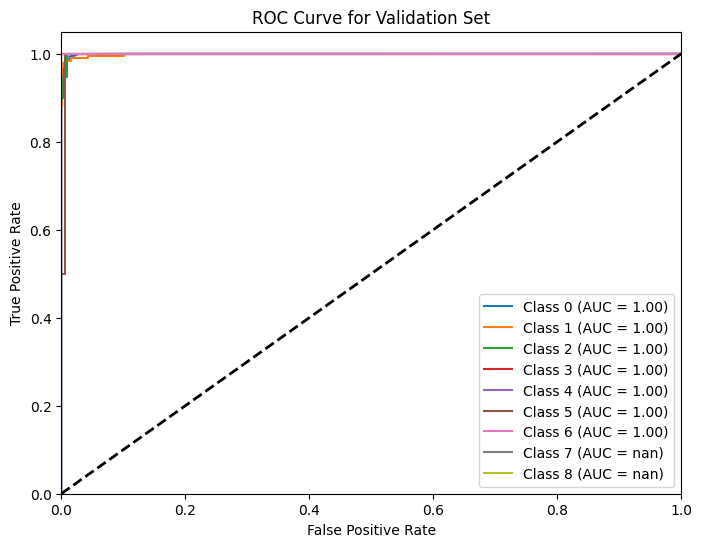

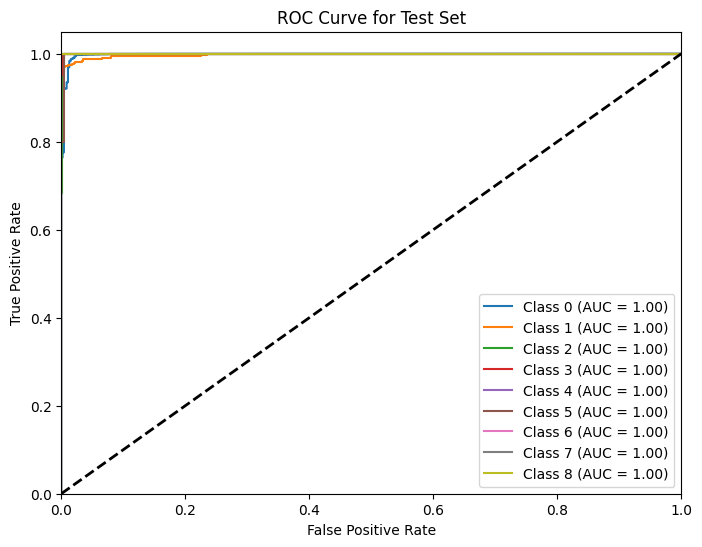


Validation Set Confusion Matrix:


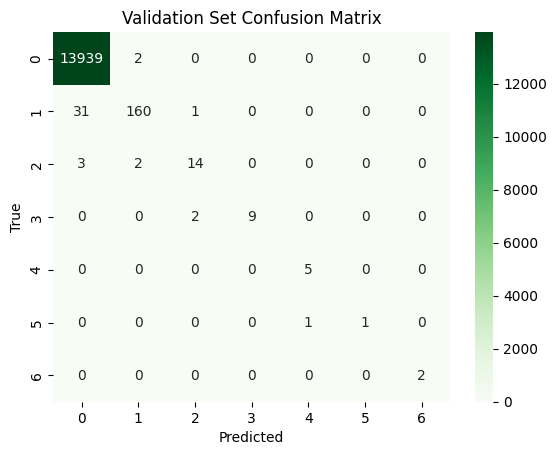


Test Set Confusion Matrix:


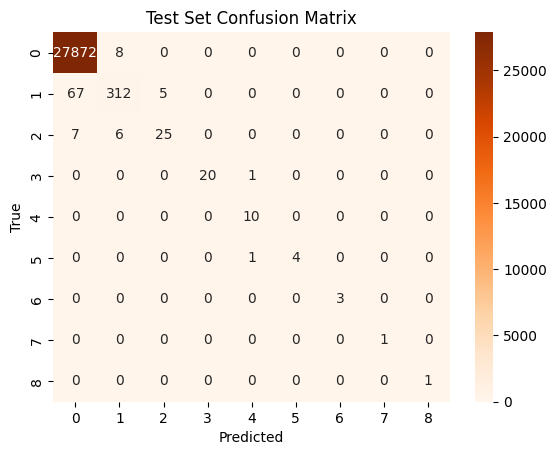


Validation Set AUC Scores:
Class 0 AUC: 0.9993
Class 1 AUC: 0.9990
Class 2 AUC: 0.9994
Class 3 AUC: 1.0000
Class 4 AUC: 1.0000
Class 5 AUC: 0.9967
Class 6 AUC: 1.0000
Class 7 AUC: nan
Class 8 AUC: nan

Test Set AUC Scores:
Class 0 AUC: 0.9982
Class 1 AUC: 0.9976
Class 2 AUC: 0.9996
Class 3 AUC: 1.0000
Class 4 AUC: 1.0000
Class 5 AUC: 0.9990
Class 6 AUC: 1.0000
Class 7 AUC: 1.0000
Class 8 AUC: 1.0000


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# Set up cross-validation with 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation predictions on the training data
Y_train_pred_cv = cross_val_predict(xgb_model, X_train, Y_train, cv=cv)

# Fit the model on the entire training data after cross-validation
xgb_model.fit(X_train, Y_train)

# Make predictions on the validation and test sets
Y_val_pred = xgb_model.predict(X_val)
Y_test_pred = xgb_model.predict(X_test)

# Convert predictions and true labels to binary format for ROC curve calculation (One-vs-Rest approach for multi-class classification)
Y_train_binarized = label_binarize(Y_train, classes=np.unique(Y_train))
Y_val_binarized = label_binarize(Y_val, classes=np.unique(Y_train))
Y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_train))

# Get the predicted probabilities for ROC
Y_val_prob = xgb_model.predict_proba(X_val)
Y_test_prob = xgb_model.predict_proba(X_test)

# ROC and AUC for Validation Set (One-vs-Rest)
n_classes = Y_val_binarized.shape[1]
fpr_val, tpr_val, roc_auc_val = dict(), dict(), dict()

for i in range(n_classes):
    fpr_val[i], tpr_val[i], _ = roc_curve(Y_val_binarized[:, i], Y_val_prob[:, i])
    roc_auc_val[i] = auc(fpr_val[i], tpr_val[i])

# Plot ROC for Validation Set
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_val[i], tpr_val[i], label=f"Class {i} (AUC = {roc_auc_val[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Validation Set")
plt.legend(loc="lower right")
plt.show()

# ROC and AUC for Test Set (One-vs-Rest)
fpr_test, tpr_test, roc_auc_test = dict(), dict(), dict()

for i in range(n_classes):
    fpr_test[i], tpr_test[i], _ = roc_curve(Y_test_binarized[:, i], Y_test_prob[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

# Plot ROC for Test Set
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_test[i], tpr_test[i], label=f"Class {i} (AUC = {roc_auc_test[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Test Set")
plt.legend(loc="lower right")
plt.show()

# Print the confusion matrices
# Confusion Matrix for Validation Set
print("\nValidation Set Confusion Matrix:")
conf_matrix_val = confusion_matrix(Y_val, Y_val_pred)
sns.heatmap(conf_matrix_val, annot=True, fmt="d", cmap="Greens", xticklabels=True, yticklabels=True)
plt.title('Validation Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for Test Set
print("\nTest Set Confusion Matrix:")
conf_matrix_test = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Oranges", xticklabels=True, yticklabels=True)
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print AUC scores
print("\nValidation Set AUC Scores:")
for i in range(n_classes):
    print(f'Class {i} AUC: {roc_auc_val[i]:.4f}')

print("\nTest Set AUC Scores:")
for i in range(n_classes):
    print(f'Class {i} AUC: {roc_auc_test[i]:.4f}')


The XGBoost classifier showed excellent performance in predicting outcomes for our dataset.

Training Set Performance:
Precision: 99.54% - This means that when the model predicts a positive outcome, it's correct 99.54% of the time.
Recall: 99.57% - This indicates that the model correctly identifies 99.57% of the actual positive outcomes.
F1 Score: 99.54% - This score balances precision and recall,
showing that the model performs well overall.
Accuracy: 99.57% - The model is correct 99.57% of the time in its predictions.

Validation Set Performance:

Precision: 99.70% - Again, the model is very reliable in its positive predictions.
Recall: 99.70% - It identifies almost all the actual positives correctly.
F1 Score: 99.69% - Shows strong overall performance.
Accuracy: 99.70% - Very high accuracy on the validation set as well.

AUC Scores:
The model's AUC scores (which measure how well it can distinguish between classes) are also very high, indicating good performance.
Some classes, specifically Classes 7 and 8, had limited data, leading to missing scores.

Overall Conclusion:
The model is performing incredibly well, especially for the main class. However, it could improve in recognizing some of the smaller classes.











